# Python Project - Prosper Loan
## by Unuabor Ose Juliet

## Introduction
> The Prosper Loan file contains 113,937 entries and 81 columns, with data primarily related to loan listings, borrower details, and loan performance metrics.The dataset in the CSV file will be examined to understand the structure and content, preliminary wrangling would be performed to clean the data, using the univariate and bivariate exploration, the data would be analysed and visualised alongside explaination of key findings.


## Preliminary Wrangling

In [80]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [82]:
df = pd.read_csv('Prosper Loan.csv')

In [84]:
# Display the first few rows to get an overview of the data
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Inspecting data

In [86]:
### Check data types and missing values
df.info()

### Check summary statistics for numerical columns
df.describe()

### Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset contains 113,937 rows (each row represents a loan listing).
There are 81 columns (each column represents a feature or attribute related to the loan, borrower, or loan performance).
> The dataset includes;
> Numerical Columns: Includes columns like loan amounts, rates, scores, and other financial metrics.
Categorical Columns: Includes text-based or coded information like borrower states, occupations, loan status, etc.
Datetime Columns: Columns containing date information that should be in datetime format.

### What is/are the main feature(s) of interest in your dataset?

> Main features of interest in this dataset set include:
> 1. ListingKey, ListingNumber: Unique identifiers for each listing.
> 2. ListingCreationDate, ClosedDate: Dates related to the loan listing and closure.
> 3. CreditGrade, ProsperRating, ProsperScore: Various ratings and scores indicating the creditworthiness of the borrower.
> 4. BorrowerAPR, BorrowerRate, LenderYield: Financial metrics related to interest rates and returns.
> 5. LoanStatus: Status of the loan (e.g., Completed, Current, Charged-off).
> 6. BorrowerState, Occupation, EmploymentStatus: Information about the borrower’s state, occupation, and employment.
> 7. CreditScoreRangeLower, CreditScoreRangeUpper: Borrower's credit score range.
> 8. IsBorrowerHomeowner: Indicates whether the borrower owns a home.
> 9. LoanAmount, MonthlyLoanPayment: Details about the loan amount and monthly payments.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features likely to support my investigation are;
> 1. Loan Performance and outcomes features: LoanStatus,BorrowerAPR, BorrowerRate, ProsperRating (Alpha),Term and ProsperScore
> 2. Borrower Characteristics and Risk Factors: CreditScoreRangeLower, CreditScoreRangeUpper, EmploymentStatus, IsBorrowerHomeOwner and Occupation
> 3. Financial Metrics: LoanAmount, MonthlyLoanPayment, DebtToIncomeRatio, LenderYeild and IncomeRange
>    These features of interest would help identify risk factors, predict loan performance and analyse interest rates

## Data Cleaning

In [88]:
###handle missing values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [90]:
missing_data=df.isnull().sum()

In [92]:
#### Delete columns with more than 50% missing values
threshold = len(df) * 0.5
columns_to_drop = missing_data[missing_data > threshold].index

In [94]:
columns_to_drop

Index(['CreditGrade', 'ClosedDate', 'GroupKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

In [96]:
#Delete the columns above
df_cleaned = df.drop(columns=columns_to_drop)

In [109]:
# Fill missing numeric columns with the median and categorical columns with the mode
numerical_col = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    df_cleaned.fillna({col:df_cleaned[col].median()}, inplace=True)

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned.fillna({col:df_cleaned[col].mode()}, inplace=True)

In [111]:
# Convert date columns to datetime format
for col in df_cleaned.columns:
    if 'Date' in col or 'date' in col:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], format="%d/%m/%Y", errors='coerce')

In [113]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 0 non-null       datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   BorrowerAPR                         113937 non-null  float64       
 6   BorrowerRate                        113937 non-null  float64       
 7   LenderYield                         113937 non-null  float64       
 8   EstimatedEffectiveYield             113937 non-null  float64       
 9   EstimatedLoss                       113937 non-null  float64       
 10  Estimate

## Univariate Exploration

> In this section, I would investigate distributions of individual variables.
> The goal is to understand how each variable is distributed and to identify any outliers or unusual patterns.


### 1.Question: What is the distribution of borrowers' income ranges?
#### Visualization: Bar Chart

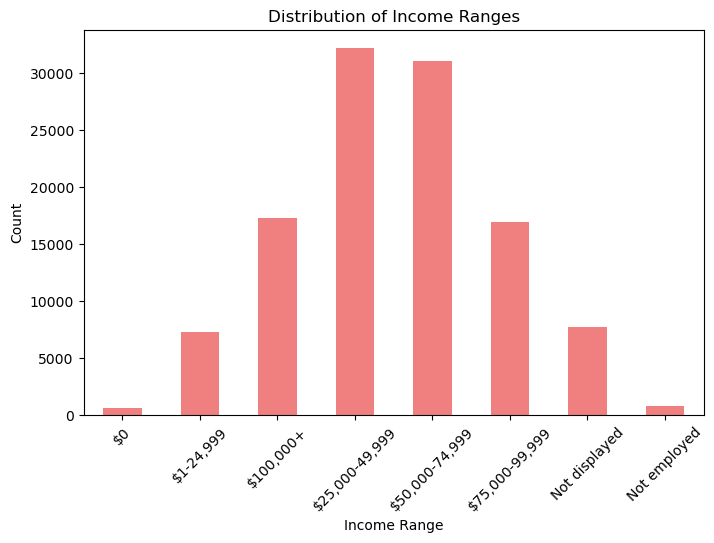

In [171]:

# Plotting the distribution of IncomeRange
plt.figure(figsize=(8, 5))
df_cleaned['IncomeRange'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Observations:

- Borrowers are often concentrated in certain income brackets, such as $25,000 - 49,999  and 50,000-74,999
- Categories like Not employed and Not displayed might require handling as they represent unknown or missing values.

    

### Question 2: What is the distribution of loan amounts?
#### Visualization: Histogram

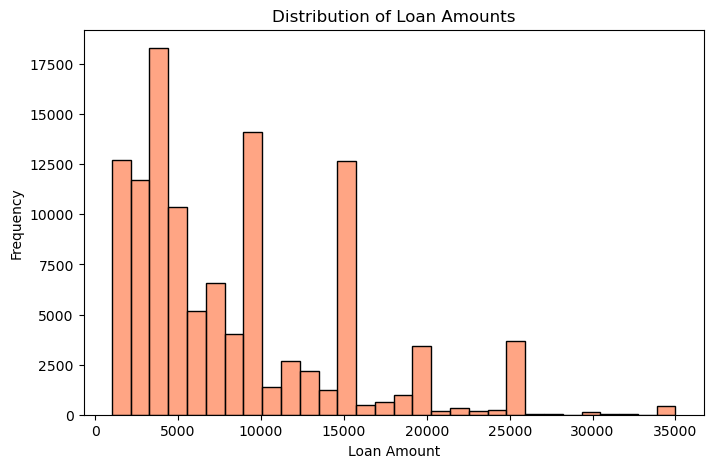

In [222]:
# Univariate: Distribution of Loan Amounts
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['LoanOriginalAmount'], bins=30, color='coral', alpha=0.7)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


#### Observations:

The loan amount distribution might be right-skewed, with most loans being of smaller amounts.
Unusually high loan amounts could indicate outliers.

### Question 3: What is the distribution of borrowers' credit scores?

#### Visualization: Kernel Density Estimate (KDE) plot

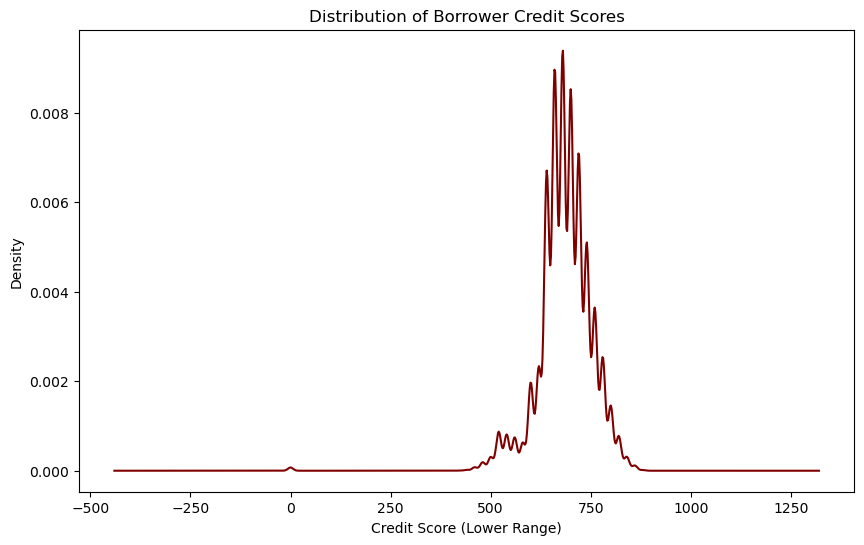

In [246]:
# Univariate: Distribution of Credit Score Range
plt.figure(figsize=(10, 6))
df_cleaned['CreditScoreRangeLower'].plot(kind='kde', color='maroon')
plt.title('Distribution of Borrower Credit Scores')
plt.xlabel('Credit Score (Lower Range)')
plt.ylabel('Density')
plt.show()


#### Observations:

Credit scores are roughly normally distributed with a peak in the mid-range.
Borrowers generally have moderate to good credit scores.

### Question 4: What is the distribution of loan terms?

#### Visualization: Pie chart

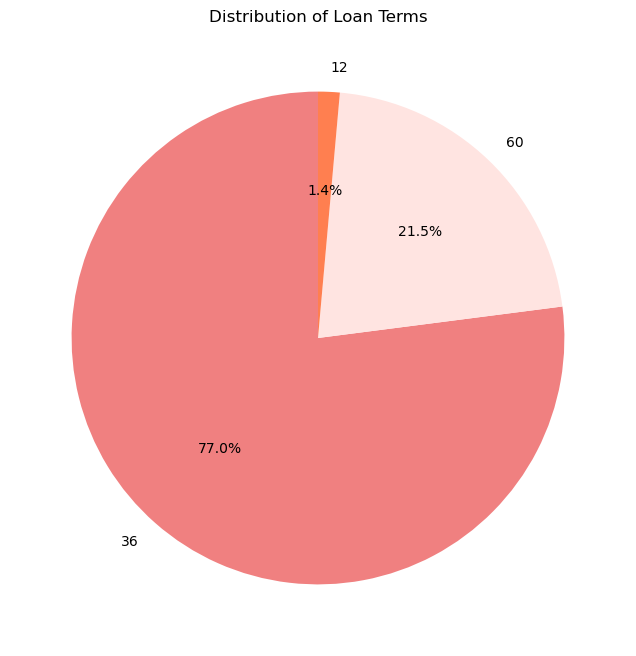

In [244]:
# Univariate: Distribution of Loan Term
plt.figure(figsize=(8, 8))
df_cleaned['Term'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'mistyrose', 'coral'])
plt.title('Distribution of Loan Terms')
plt.ylabel('')
plt.show()

### Observations:

Most loans are either for 36 months or 60 months, with a smaller portion of loans for 12 months.
Longer terms are more common

### Question 5: What is the employment status distribution among borrowers?

#### Visualization: Horizontal Bar Chart

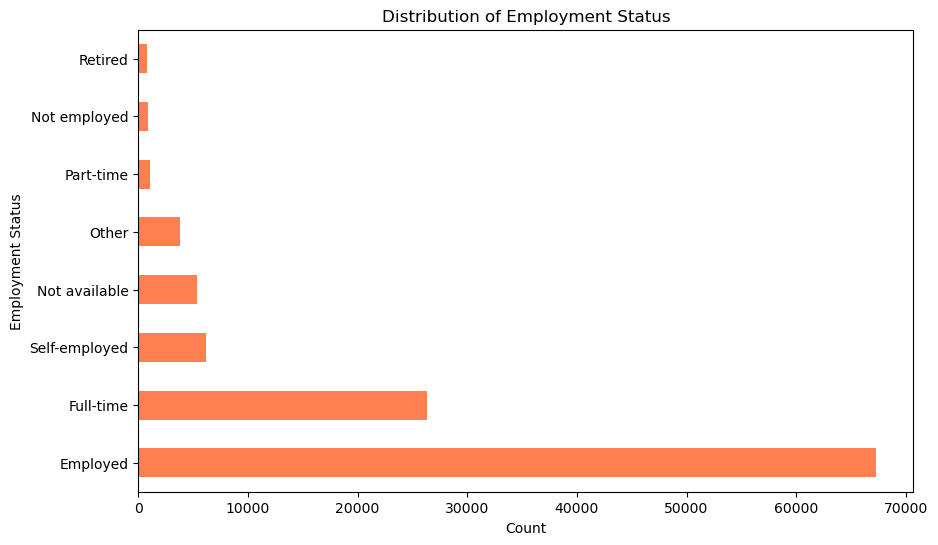

In [252]:
# Univariate: Employment Status Distribution
plt.figure(figsize=(10, 6))
df_cleaned['EmploymentStatus'].value_counts().plot(kind='barh', color='coral')
plt.title('Distribution of Employment Status')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.show()


### Observations:

Most borrowers are employed full-time, while a significant number are self-employed or retired.
A few categories like Not employed might need special attention.

# Bivariate Exploration

> In this section, i would investigate relationships between pairs of variables in the prosper loan
data. 

### Question 1: Does income influence loan amount?

#### Visualization: Box plot

<Figure size 1300x800 with 0 Axes>

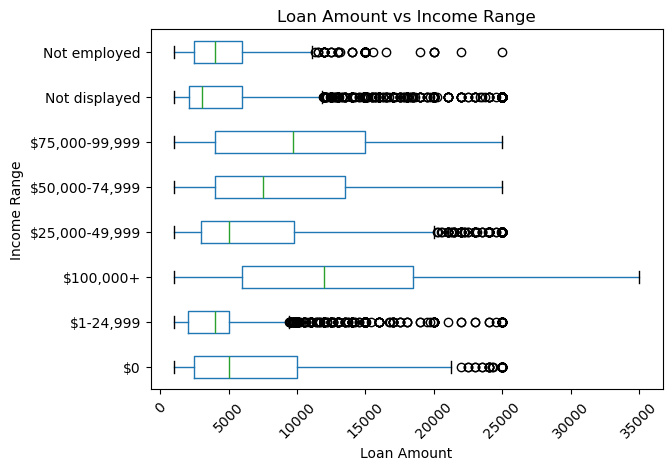

In [274]:
# Bivariate: Loan Amount vs Income Range
plt.figure(figsize=(13, 8))
df_cleaned.boxplot(column='LoanOriginalAmount', by='IncomeRange', grid=False, vert=False)
plt.title('Loan Amount vs Income Range')
plt.xlabel('Loan Amount')
plt.ylabel('Income Range')
plt.xticks(rotation=45)
plt.suptitle('')
plt.show()


### Observations:

- Higher income ranges tend to have larger loan amounts.
- There are significant variations within each income range, suggesting that loan amount isn’t solely dependent on income.

### Question 2: Is there a relationship between loan term and loan amount?

#### Visualization: Violin plot

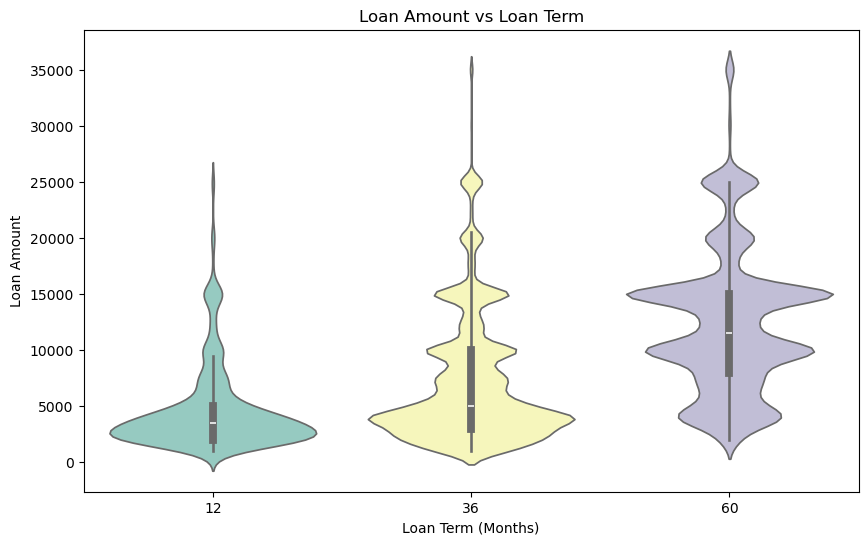

In [277]:
# Bivariate: Loan Amount vs Loan Term
plt.figure(figsize=(10, 6))
sns.violinplot(x='Term', y='LoanOriginalAmount', data=df_cleaned, hue='Term', palette="Set3", legend=False)
plt.title('Loan Amount vs Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount')
plt.show()



#### Observations:
- Loan amounts increase with longer terms, especially for 60-month loans.
- The distribution is wider for longer terms, meaning higher variation in loan amounts.

### Question 3: How does the Prosper score relate to loan amounts?

#### Visualization: Scatter plot


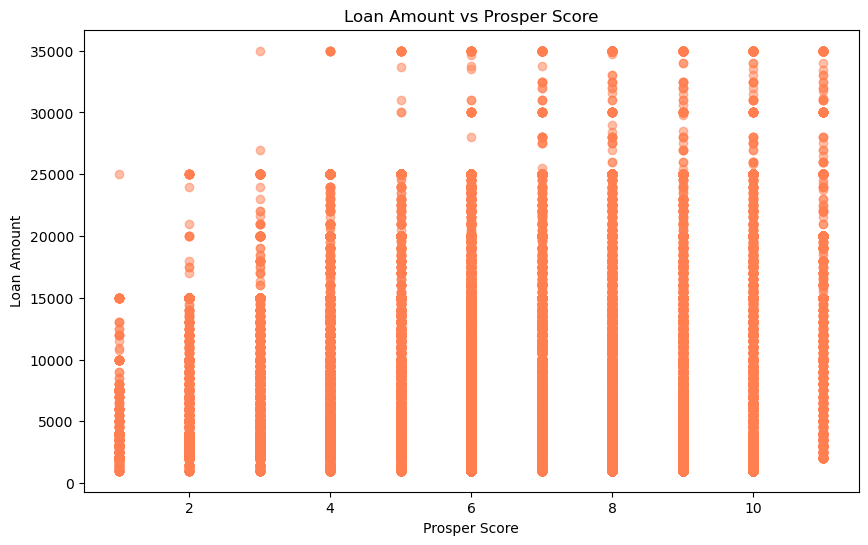

In [284]:
# Bivariate: Prosper Score vs Loan Amount
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['ProsperScore'], df_cleaned['LoanOriginalAmount'], alpha=0.5, color='coral')
plt.title('Loan Amount vs Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Loan Amount')
plt.grid(False)
plt.show()


### Observations:

- There is a slight positive trend where higher Prosper scores correspond to higher loan amounts.
- The relationship is not strong, indicating other factors also affect loan amounts.

### Question 4: Does credit score influence borrower APR?

#### Visualization: Line plot

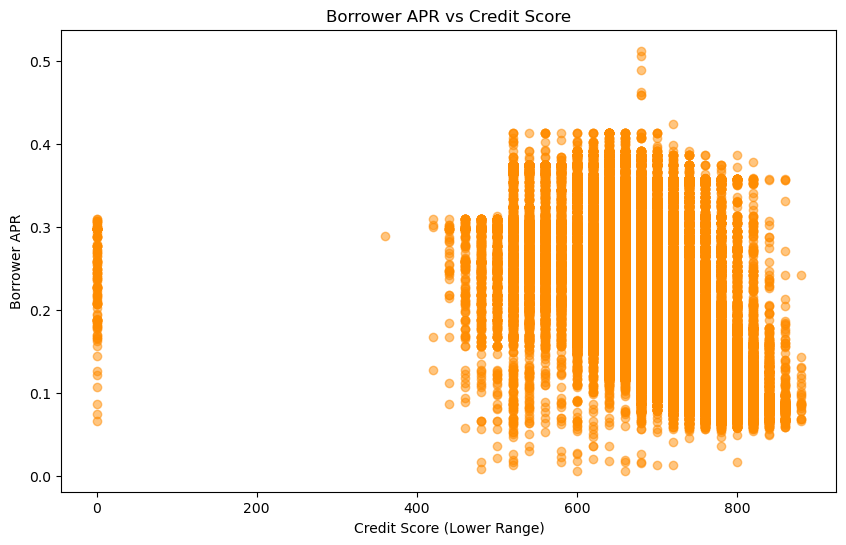

In [291]:
# Bivariate: Credit Score Range vs Borrower APR
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['CreditScoreRangeLower'], df_cleaned['BorrowerAPR'], 'o', alpha=0.5, color='darkorange')
plt.title('Borrower APR vs Credit Score')
plt.xlabel('Credit Score (Lower Range)')
plt.ylabel('Borrower APR')
plt.show()


### Observations:

- Borrowers with higher credit scores tend to have lower APRs.
- The relationship is clear, with APRs decreasing as credit scores improve.

### Question 5: How do homeownership and loan amounts relate?

#### Visualization: Bar plot

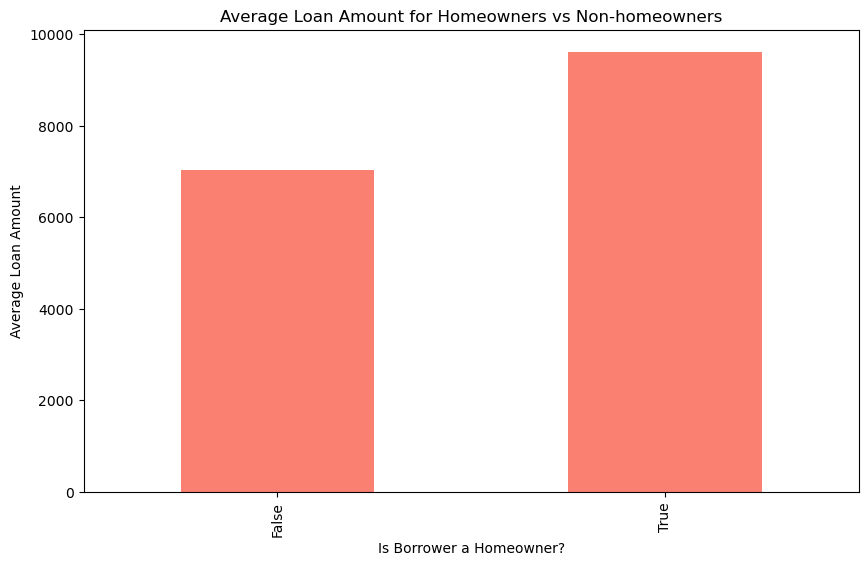

In [304]:
# Bivariate: Homeownership vs Loan Amount
plt.figure(figsize=(10, 6))
df_cleaned.groupby('IsBorrowerHomeowner')['LoanOriginalAmount'].mean().plot(kind='bar', color='salmon')
plt.title('Average Loan Amount for Homeowners vs Non-homeowners')
plt.xlabel('Is Borrower a Homeowner?')
plt.ylabel('Average Loan Amount')
plt.show()


### Observations:

- Homeowners tend to borrow larger loan amounts on average compared to non-homeowners.
- This may indicate greater financial security or the ability to offer collateral.

## Conclusions
>After conducting thorough univariate and bivariate explorations of the dataset, we’ve gathered significant insights into the characteristics and relationships between various features and key variables.
>The analysis of the Prosper Loan dataset provides valuable insights into the factors influencing loan amounts, including income, credit scores, loan terms, and homeownership. Income plays a critical role, but it is not the sole determinant of loan size—credit scores, employment status, and loan term preferences also significantly influence loan approvals and amounts.
>Key takeaways include:

- Income and credit scores are pivotal in determining the size of the loan and the associated APR.
- Loan terms and employment status influence how much borrowers are willing or able to borrow.
- Homeownership correlates with larger loan amounts, indicating a potential signal of financial stability to lenders.
>These findings can guide Prosper Loan in better understanding borrower behavior and risk, and can help borrowers in improving their profiles to secure better loan terms.